In [316]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
np.set_printoptions(threshold=10000)
from sklearn.model_selection import train_test_split
from keras import utils as np_utils
import tensorflow as tf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt



In [317]:
images  = np.load('./images.npy')
labels  = np.load('./labels.npy')

In [318]:
seed = 42
np.random.seed(seed)

In [319]:
print(images.shape)
print(labels.shape)

(6500, 784)
(6500,)


In [320]:
labels = tf.keras.utils.to_categorical(labels)

In [321]:
labels.shape

(6500, 10)

## Model Spplitting (Train, Validation, Test)

In [322]:
# training = 60%, validation = 15%, testing = 25%

In [323]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.40, random_state=42, stratify=labels)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.375, random_state=42, stratify=y_test)
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(3900, 784)
(975, 784)
(1625, 784)


## Model Selection

In [324]:
# Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = Sequential() # declare model
model.add(Dense(10, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
model.add(Activation('relu'))

In [325]:
# Our Model
model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='random_normal')) # second layer
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='random_normal')) # second layer
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='random_normal')) # second layer
model.add(Activation('relu'))
# model.add(Dense(50, kernel_initializer='random_uniform')) # fourth layer
# model.add(Activation('tanh'))

In [326]:
model.add(Dense(10, kernel_initializer='he_normal')) # last layer
model.add(Activation('softmax'))

In [327]:
# Compile Model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [328]:
# Train Model
history = model.fit(x_train, y_train, 
                    validation_data = (x_validation, y_validation), 
                    epochs=50, 
                    batch_size=32)

Epoch 1/50
122/122 [==============================] - 1s 4ms/step - loss: 2.2970 - accuracy: 0.1877 - val_loss: 2.2873 - val_accuracy: 0.2308
Epoch 2/50
122/122 [==============================] - 0s 2ms/step - loss: 2.2074 - accuracy: 0.2387 - val_loss: 1.9418 - val_accuracy: 0.2851
Epoch 3/50
122/122 [==============================] - 0s 2ms/step - loss: 1.5647 - accuracy: 0.3738 - val_loss: 1.4956 - val_accuracy: 0.3303
Epoch 4/50
122/122 [==============================] - 0s 2ms/step - loss: 1.1540 - accuracy: 0.5033 - val_loss: 1.1279 - val_accuracy: 0.5405
Epoch 5/50
122/122 [==============================] - 0s 2ms/step - loss: 0.9778 - accuracy: 0.5938 - val_loss: 0.8924 - val_accuracy: 0.6092
Epoch 6/50
122/122 [==============================] - 0s 2ms/step - loss: 0.9391 - accuracy: 0.6118 - val_loss: 0.8198 - val_accuracy: 0.6308
Epoch 7/50
122/122 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.6505 - val_loss: 0.7850 - val_accuracy: 0.6728
Epoch 

In [329]:
# Report Results

# print(history.history)
prediction = model.predict(
    x_test,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )

In [330]:
print(list(prediction[0]).index(prediction[0].max()))
print(list(y_test[0]).index(1))

    


1
1


[0.5655834078788757, 0.8110769391059875]
Error: 18.89%
Accuracy: 81.11%
Predicted    0    1    2    3    4    5    6    7    8    9   All
Actual                                                           
0          142    0    5   14    2    0   17    0    0    0   180
1            2  154    2    6    0    0    1    0    0    0   165
2            3    1   94    1   34    1   25    0    2    1   162
3            8    4    1  135    2    0    3    0    0    0   153
4            0    1   13    5  139    0   14    0    0    0   172
5            2    0    0    0    0  125    0   18    2   15   162
6           28    1   14    4   14    1   86    0    3    0   151
7            0    0    0    1    0    3    0  140    0   17   161
8            1    0    0    0    0    7    4    0  140    1   153
9            0    0    0    0    0    1    0    2    0  163   166
All        186  161  129  166  191  138  150  160  147  197  1625


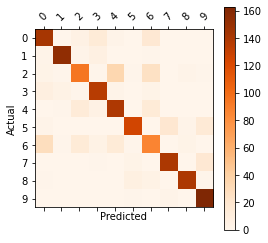

In [331]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(scores)
accuracy = scores[1] * 100
error = 100 - scores[1] * 100
print("Error: %.2f%%" % error)
print("Accuracy: %.2f%%" % accuracy)

projection, actual = [], []

# Iterate through predictions, determining which value recieved the highest prediction and
#   marking that value in a list (denoting our prediction)
for p in prediction:

    # Reset max value, index, and max index each iteration
    maximum = float(0)
    index, max_index = 0, -1

    # Iterate through each set of preductions determining the highest predicted value
    for n in p:
        if float(n) > maximum:
            maximum = float(n)
            max_index = index
        index += 1

    # Mark our projection for this set in our list
    projection.append(max_index)

# Convert test set (actuals) back to standard numerical format
for t in y_test:
    actual.append(np.argmax(t))

# Generate Confusion Matrix
y_actual = pd.Series(actual, name='Actual')
y_predict = pd.Series(projection, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predict)

# Generate normalized confusion matrix
norm_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

# Generate full confusion matrix with totals
full_confusion_matrix = pd.crosstab(y_actual, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)

# print(norm_confusion_matrix)
print(full_confusion_matrix)

# Pretty plot pretty please
cmap = mpl.cm.get_cmap('Oranges')
plt.matshow(confusion_matrix, cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(confusion_matrix.columns))
plt.xticks(tick_marks, confusion_matrix.columns, rotation=45)
plt.yticks(tick_marks, confusion_matrix.index)

plt.ylabel(confusion_matrix.index.name)
plt.xlabel(confusion_matrix.columns.name)

plt.show()